In [2]:
import numpy as np
import h5py
import os
import matplotlib.pyplot as plt
import matplotlib.colors as plt_colors
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import seaborn as sns
from os import listdir

def sort_value(arr):
    positive_count = 0
    negative_count = 0
    
    if len(arr) > 0:
        for n in range(len(arr)):
            if arr[n] > 0 :
                positive_count +=1
            if arr[n] < 0 :
                negative_count +=1
        return positive_count,negative_count
    

def hist_cus(data, bins, arr):
    #new a array to remove over bins value(if spikes 100.1 ,time=0~100, this spike is remove)
    new_arr_for_data = []
    bins_latest_value = bins[bins.shape[0]-1]#the position is start 0 ,so last one is n-1
    for n in range(len(data)):
        if data[n] < bins_latest_value :
            new_arr_for_data.append(data[n])
            
    map_to_bins = np.digitize(new_arr_for_data, bins)
#     print('map_to_bins :', map_to_bins)
    if(len(arr) != 0):
        #add 
        for j in map_to_bins:
            # j = map_to_bis[0]~[latest],so below map_to_bis[0] = 0
            if j > 0:
                arr[j-1] += 1
        return arr
    
    else:
        #new one
        r = np.zeros(bins.shape)
        for i in map_to_bins:
            if i > 0:
                r[i-1] += 1
        return r
def add_spike_by_window(arr, window):
    if len(arr) > 0:
        tatol_data = []
        t_last = []
        tatol_data.append(arr)
        for i in range(window):
            m = [0]   
            t_last = t_last+m
#             print('>>',arr[:-(1+i)])
            add_value = t_last+(arr[:-(1+i)]).tolist()
            tatol_data.append(add_value)

        sum_tatol_data = np.zeros(len(arr))
        
        for j in range(len(tatol_data)):
#             print(tatol_data[j])
            sum_tatol_data = sum_tatol_data+np.array(tatol_data[j])
        
        return sum_tatol_data
        

#heatmap color define
norm = plt_colors.Normalize(0,0.5)
colors = [[norm(0),"b"], [norm(0.1),"g"], [norm(0.275),"yellow"],[norm(0.5),"r"]]

norm2 = plt_colors.Normalize(-0.5,0.5)
colors2 = [[norm2(-0.5), "b"], [norm2(-0.2), "g"],[norm2(0.2),"yellow"],[norm2(0.5), "r"]]

comp_cus = plt_colors.LinearSegmentedColormap.from_list("",colors)
comp_cus2 = plt_colors.LinearSegmentedColormap.from_list("",colors2)
# comp_cus2 = plt_colors.LinearSegmentedColormap.from_list("",colors2)
'''M1 channel position
 N 42 46 25 31 35 39 41 47 N
38 40 48 27 29 33 37 43  6 45
34 36 44  1  9 13 17 21  2 88
30 32 89 93  5 15 19 23  8 84
26 28 81 85 87 91  7  4 86 80
22 24 77 79 83  3 11 66 82 76
18 20 73 15 95 54 62 74 78 72
14 16 94 96 57 58 50 70 64 68
10 16 90 92 61 65 69 71 56 60
 N 51 49 53 55 59 63 67 52 N 
'''
#
all_channel_pos = []
all_channel_pos.append(['N', 42, 46, 25, 31, 35, 39, 41, 47, 'N'])
all_channel_pos.append([38, 40, 48, 27, 29, 33, 37, 43,  6, 45])
all_channel_pos.append([34, 36, 44,  1,  9, 13, 17, 21,  2, 88])
all_channel_pos.append([30, 32, 89, 93,  5, 15, 19, 23,  8, 84])
all_channel_pos.append([26, 28, 81, 85, 87, 91,  7,  4, 86, 80])
all_channel_pos.append([22, 24, 77, 79, 83,  3, 11, 66, 82, 76])
all_channel_pos.append([18, 20, 73, 15, 95, 54, 62, 74, 78, 72])
all_channel_pos.append([14, 16, 94, 96, 57, 58, 50, 70, 64, 68])
all_channel_pos.append([10, 16, 90, 92, 61, 65, 69, 71, 56, 60])
all_channel_pos.append([ 'N', 51, 49, 53, 55, 59, 63, 67, 52 ,'N' ])
# print(all_channel_pos)
print('start init.')


start init.



-------------
File index : 1
file_name:indy_20160426_01.mat
-------------

file keys() ==  ['#refs#', 'chan_names', 'cursor_pos', 'finger_pos', 'spikes', 't', 'target_pos', 'wf']
CHANNELS : <HDF5 dataset "chan_names": shape (1, 192), type "|O">
TIMES : <HDF5 dataset "t": shape (1, 440517), type "<f8">
START_Time == 479.944, END_Time == 2242.008


FINGER_POS : <HDF5 dataset "finger_pos": shape (6, 440517), type "<f8">

SPIKES : <HDF5 dataset "spikes": shape (5, 192), type "|O">
This Session Unit count:  5

------------------

Vel count:  27533

Unit count : 5
[array([1., 2., 1., ..., 1., 0., 0.])]


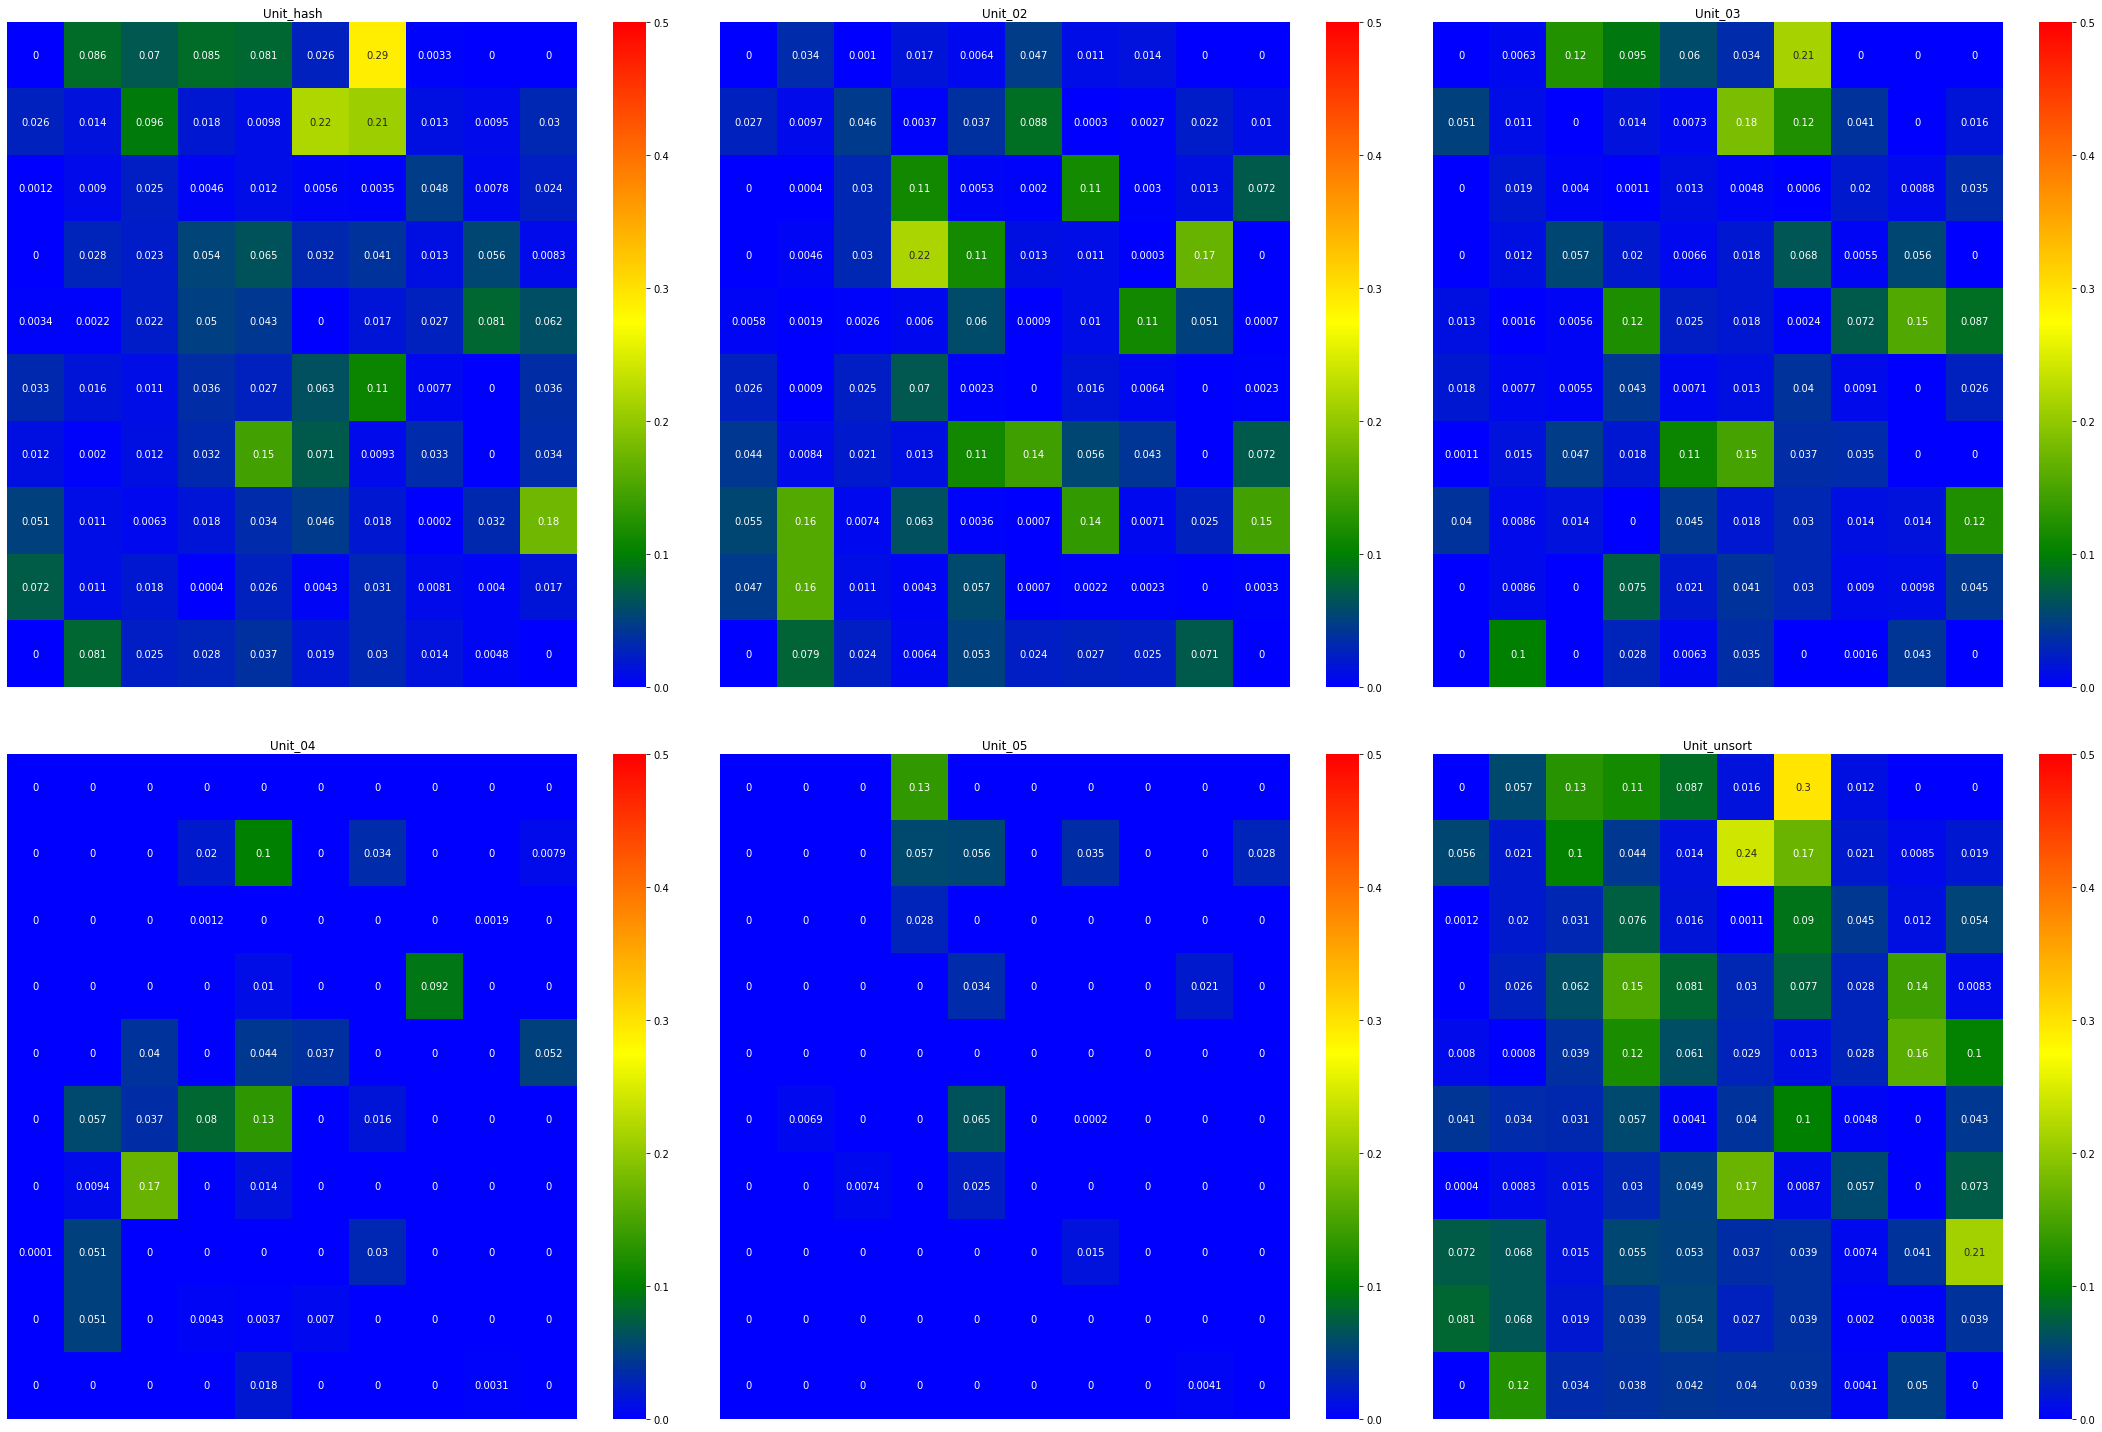

In [5]:
#initial data

lag = 0

window = 1
OUTPUT_DATA_hash = []
OUTPUT_DATA_unsort = []
OUTPUT_DATA_lag = []
OUTPUT_DATA_window = []
OUTPUT_SESSION = []
FILE_PATH = str('/home/nclab62159/machineLearning/plot/train_data_source/')
List_FILE = listdir(FILE_PATH)
List_FILE.sort()
#if want to seleted some one ex:
List_FILE=List_FILE[6:7]
# List_FILE=List_FILE[10:11]
# List_FILE=['indy_20160407_02.mat']
GET_FILE = []
for FILE_NAME in List_FILE:
    GET_FILE.append(FILE_PATH + FILE_NAME)

for k in range(len(GET_FILE)):
    file = str(GET_FILE[k])
    file_name = str(List_FILE[k])
    print('\n-------------')
    print('File index :',k+1)
#     print('File Path :'+ file)
    print('file_name:'+ file_name)
    print('-------------\n')
    
    mat_file = h5py.File(file,'r')
    print('file keys() == ',list(mat_file.keys()))
    CHANNELS = mat_file[list(mat_file.keys())[1]]
    FINGER_POS = mat_file[list(mat_file.keys())[3]]
    TIMES = mat_file[list(mat_file.keys())[5]]
    SPIKES = mat_file[list(mat_file.keys())[4]]
    print('CHANNELS :',CHANNELS)
    print('TIMES :', TIMES)
    print('START_Time == '+str((TIMES[0])[0]) + ', END_Time == '+str((TIMES[0])[len(TIMES[0])-1])+"\n")

    print('\nFINGER_POS :', FINGER_POS)
    print('\nSPIKES :',SPIKES)
    Input_Unit_Count = int(len(np.transpose(SPIKES)[0]))

    if Input_Unit_Count != 3 :
        print('This Session Unit count: ',Input_Unit_Count)
        if Input_Unit_Count !=5 :
            print('This file unit is not 3 or 5 ,please check input File! ')
    else :
        print('This Session Unit count: ',Input_Unit_Count)
    
    print('\n------------------\n')
    time_bins_64ms = np.array(TIMES[0][::16])
#     print("time_bins_64ms == ",time_bins_64ms)
    n = time_bins_64ms.shape[0]
    #get velocity
    np_finger_pos_z_64ms = np.array(FINGER_POS[0][::16])
    np_finger_pos_x_64ms = np.array(FINGER_POS[1][::16])
    np_finger_pos_y_64ms = np.array(FINGER_POS[2][::16])
    np_times = np.array(TIMES[0])
    Vel_z_64ms = []
    Vel_z_64ms.append(0)
    Vel_x_64ms = []
    Vel_x_64ms.append(0)
    Vel_y_64ms = []
    Vel_y_64ms.append(0)
    
    for i in range(n):
        if i < (n-1):
            vz = (np_finger_pos_z_64ms[i+1]-np_finger_pos_z_64ms[i])/(time_bins_64ms[i+1]-time_bins_64ms[i])
            vx = (np_finger_pos_x_64ms[i+1]-np_finger_pos_x_64ms[i])/(time_bins_64ms[i+1]-time_bins_64ms[i])
            vy = (np_finger_pos_y_64ms[i+1]-np_finger_pos_y_64ms[i])/(time_bins_64ms[i+1]-time_bins_64ms[i])
            Vel_z_64ms.append(vz)
            Vel_x_64ms.append(vx)
            Vel_y_64ms.append(vy)

    print('Vel count: ',len(Vel_y_64ms))
        
    '''
    GET firing rate
    '''
    
    print("\nUnit count :", Input_Unit_Count)
    firing_rate_hash = []
    firing_rate_unit2 = []
    firing_rate_unit3 = []
    firing_rate_unit4 = []
    firing_rate_unit5 = []
    firing_rate_unsort = []
    firing_rate_unsort_window = []
    for i in range(10) :
        for j in range(10):
            if str(all_channel_pos[i][j]) != 'N':
#             print(all_channel_pos[i][j])
                seleted_channel = all_channel_pos[i][j]
                unit_hash = mat_file[SPIKES[0][seleted_channel-1]]
                unit_02 = mat_file[SPIKES[1][seleted_channel-1]]
                unit_03 = mat_file[SPIKES[2][seleted_channel-1]]
                unit_unsort = []
                #
                if unit_hash.shape[0] !=2:
                    firing_rate_hash.append(hist_cus(unit_hash[0],time_bins_64ms,[]))
                    unit_unsort = hist_cus(unit_hash[0],time_bins_64ms,[])
                else:
                    firing_rate_hash.append(np.zeros(time_bins_64ms.shape[0]))
                    unit_unsort = np.zeros(time_bins_64ms.shape[0])
                
                #    
                if unit_02.shape[0] != 2:
                    firing_rate_unit2.append(hist_cus(unit_02[0], time_bins_64ms, []))
                    unit_unsort = hist_cus(unit_02[0], time_bins_64ms, unit_unsort)
                else:
                    firing_rate_unit2.append(np.zeros(time_bins_64ms.shape[0]))
                #
                if unit_03.shape[0] != 2:
                    firing_rate_unit3.append(hist_cus(unit_03[0], time_bins_64ms, []))
                    unit_unsort = hist_cus(unit_03[0], time_bins_64ms, unit_unsort)
                else:
                    firing_rate_unit3.append(np.zeros(time_bins_64ms.shape[0]))
                       
                if(Input_Unit_Count == 5):    
                #unit count has 5    
                    unit_04 = mat_file[SPIKES[3][seleted_channel-1]]
                    unit_05 = mat_file[SPIKES[4][seleted_channel-1]]
                
                    #
                    if unit_04.shape[0] != 2:
                        firing_rate_unit4.append(hist_cus(unit_04[0], time_bins_64ms,[]))
                        unit_unsort = hist_cus(unit_04[0], time_bins_64ms, unit_unsort)
                    else:
                        firing_rate_unit4.append(np.zeros(time_bins_64ms.shape[0]))
                    #
                    if unit_05.shape[0] != 2:
                        firing_rate_unit5.append(hist_cus(unit_05[0], time_bins_64ms,[]))
                        unit_unsort = hist_cus(unit_05[0], time_bins_64ms, unit_unsort)
                    else:
                        firing_rate_unit5.append(np.zeros(time_bins_64ms.shape[0]))

                firing_rate_unsort.append(unit_unsort)
                firing_rate_unsort_window.append(add_spike_by_window(unit_unsort,window))
            else :
#             print('channel null :',all_channel_pos[i][j])
                firing_rate_hash.append('N')
                firing_rate_unit2.append('N')
                firing_rate_unit3.append('N')
               
                if(Input_Unit_Count == 5):
                    firing_rate_unit4.append('N')
                    firing_rate_unit5.append('N')
                
                firing_rate_unsort.append('N')
                firing_rate_unsort_window.append('N')
    #
    print(firing_rate_unsort[2:3])
    
    pearsonr_hash = []
    pearsonr_unit02 = []
    pearsonr_unit03 = []
    pearsonr_unit04 = []
    pearsonr_unit05 = []
    pearsonr_unsort = []
    pearsonr_unsort_lag = []
    pearsonr_unsort_window = []
    # print((firing_rate_hash[22])[:20])
    # print((firing_rate_unit2[22])[:20])
    # print((firing_rate_unit3[22])[:20])
    # print((firing_rate_unit4[22])[:20])
    # print((firing_rate_unit5[22])[:20])
    # print((firing_rate_unsort[22])[:20])
    # print(INPUT_Y[:20])
    #-------------------------------
    INPUT_Y = np.array(Vel_y_64ms[1:])# var
    INPUT_Data_lag = np.array(Vel_y_64ms[1+lag:])
    INPUT_Data_window = np.array(Vel_x_64ms[1+lag:])
    #-------------------------------
    for m in range(100):
    #-----hash
        if str(firing_rate_hash[m]) == 'N':
            pearsonr_hash.append(0)
        else:
            corr_hash, _ = pearsonr(np.array((firing_rate_hash[m])[:-1]), INPUT_Y)
            if str(corr_hash) == 'nan':
                #unit is null 
#             print(str(m)+'== m :',0)
                pearsonr_hash.append(0)
            else:
#             print(str(m)+'== m :',round(corr_hash,4))
                pearsonr_hash.append(round(corr_hash,4))
    #-----unit02
        if str(firing_rate_unit2[m]) == 'N':
            pearsonr_unit02.append(0)
        else:
            corr_unit02,_ = pearsonr(np.array((firing_rate_unit2[m])[:-1]),INPUT_Y)
            if str(corr_unit02) == 'nan':
                pearsonr_unit02.append(0)
            else:
                pearsonr_unit02.append(round(corr_unit02,4))
            
    #-----unit03
        if str(firing_rate_unit3[m]) == 'N':
            pearsonr_unit03.append(0)
        else:
            corr_unit03,_ = pearsonr(np.array((firing_rate_unit3[m])[:-1]),INPUT_Y)
            if str(corr_unit03) == 'nan':
                pearsonr_unit03.append(0)
            else:
                pearsonr_unit03.append(round(corr_unit03,4))
    
        if(Input_Unit_Count == 5):  
    #-----unit04
            if str(firing_rate_unit4[m]) == 'N':
                pearsonr_unit04.append(0)
            else:
                corr_unit04,_ = pearsonr(np.array((firing_rate_unit4[m])[:-1]),INPUT_Y)
                if str(corr_unit04) == 'nan':
                    pearsonr_unit04.append(0)
                else:
                    pearsonr_unit04.append(round(corr_unit04,4))
    #-----unit05
            if str(firing_rate_unit5[m]) == 'N':
                pearsonr_unit05.append(0)
            else:
                corr_unit05,_ = pearsonr(np.array((firing_rate_unit5[m])[:-1]),INPUT_Y)
                if str(corr_unit05) == 'nan':
                    pearsonr_unit05.append(0)
                else:
                    pearsonr_unit05.append(round(corr_unit05,4))
    #-----unsort
        if str(firing_rate_unsort[m]) == 'N':
            pearsonr_unsort.append(0)
            pearsonr_unsort_lag.append(0)
            pearsonr_unsort_window.append(0)
        else:
            corr_unsort,_ = pearsonr(np.array((firing_rate_unsort[m])[:-1]),INPUT_Y)
            corr_unsort_lag,_ = pearsonr(np.array((firing_rate_unsort[m])[:-1-lag]),INPUT_Data_lag)
            corr_unsort_window,_ = pearsonr(np.array((firing_rate_unsort_window[m])[:-1-lag]),INPUT_Data_window)
            if str(corr_unsort) == 'nan':
                pearsonr_unsort.append(0)
                pearsonr_unsort_lag.append(0)
                pearsonr_unsort_window.append(0)
            else:
                pearsonr_unsort.append(round(corr_unsort,4))
                pearsonr_unsort_lag.append(round(corr_unsort_lag,4))
                pearsonr_unsort_window.append(round(corr_unsort_window, 4))
    #-----plot data
    if len(List_FILE) == 1:
    
        if(Input_Unit_Count == 5):
            fig, ax = plt.subplots(2,3, figsize = (30,20))
            
            ax[0,0].set_title('Unit_hash')
            sns.heatmap(abs(np.array(pearsonr_hash)).reshape(10,10),vmin=0,vmax=0.5,cmap=comp_cus,xticklabels=False, yticklabels=False,annot=True,ax=ax[0,0])
            ax[0,1].set_title('Unit_02')
            sns.heatmap(abs(np.array(pearsonr_unit02)).reshape(10,10),vmin=0,vmax=0.5,cmap=comp_cus,xticklabels=False, yticklabels=False,annot=True,ax=ax[0,1])
            ax[0,2].set_title('Unit_03')
            sns.heatmap(abs(np.array(pearsonr_unit03)).reshape(10,10),vmin=0,vmax=0.5,cmap=comp_cus,xticklabels=False, yticklabels=False,annot=True,ax=ax[0,2])
            ax[1,0].set_title('Unit_04')
            sns.heatmap(abs(np.array(pearsonr_unit04)).reshape(10,10),vmin=0,vmax=0.5,cmap=comp_cus,xticklabels=False, yticklabels=False,annot=True,ax=ax[1,0])
            ax[1,1].set_title('Unit_05')
            sns.heatmap(abs(np.array(pearsonr_unit05)).reshape(10,10),vmin=0,vmax=0.5,cmap=comp_cus,xticklabels=False, yticklabels=False,annot=True,ax=ax[1,1])
            ax[1,2].set_title('Unit_unsort')
            sns.heatmap(abs(np.array(pearsonr_unsort)).reshape(10,10),vmin=0,vmax=0.5,cmap=comp_cus,xticklabels=False, yticklabels=False,annot=True,ax=ax[1,2])
            fig.tight_layout()
           
        #     plt.savefig('/home/nclab62159/machineLearning/plot/heatmap/indy_20170123_02_noABS.png')
        else:
            fig, ax = plt.subplots(2,2, figsize = (20,20))
            ax[0,0].set_title('Unit_hash')
            sns.heatmap(abs(np.array(pearsonr_hash)).reshape(10,10),vmin=0,vmax=0.5,cmap=comp_cus,xticklabels=False, yticklabels=False,annot=True,ax=ax[0,0])
            ax[0,1].set_title('Unit_02')
            sns.heatmap(abs(np.array(pearsonr_unit02)).reshape(10,10),vmin=0,vmax=0.5,cmap=comp_cus,xticklabels=False, yticklabels=False,annot=True,ax=ax[0,1])
            ax[1,0].set_title('Unit_03')
            sns.heatmap(abs(np.array(pearsonr_unit03)).reshape(10,10),vmin=0,vmax=0.5,cmap=comp_cus,xticklabels=False, yticklabels=False,annot=True,ax=ax[1,0])
            ax[1,1].set_title('Unit_unsort')
            sns.heatmap(abs(np.array(pearsonr_unsort_window)).reshape(10,10),vmin=0,vmax=0.5,cmap=comp_cus,xticklabels=False, yticklabels=False,annot=True,ax=ax[1,1])
        #     plt.savefig('/home/nclab62159/machineLearning/plot/heatmap/indy_20170131_02.png')
#         plt.savefig('/home/nclab62159/machineLearning/plot/20191125/6.png')
        # print(np.array(pearsonr_hash).reshape(10,10))
        # plt.figure(figsize=(8,8))
    else:
        OUTPUT_DATA_unsort.append(pearsonr_unsort)
        OUTPUT_DATA_hash.append(pearsonr_hash)
        OUTPUT_DATA_lag.append(pearsonr_unsort_lag)
        OUTPUT_SESSION.append(file_name)
        OUTPUT_DATA_window.append(pearsonr_unsort_window)
        
#         save_file_path = OUTPUT_FILE_PATH + os.path.splitext(file_name)[0] + '.png'
#         print('save_file_path :'+save_file_path)
        
plt.subplots_adjust(wspace = 0, hspace = 0.1)        


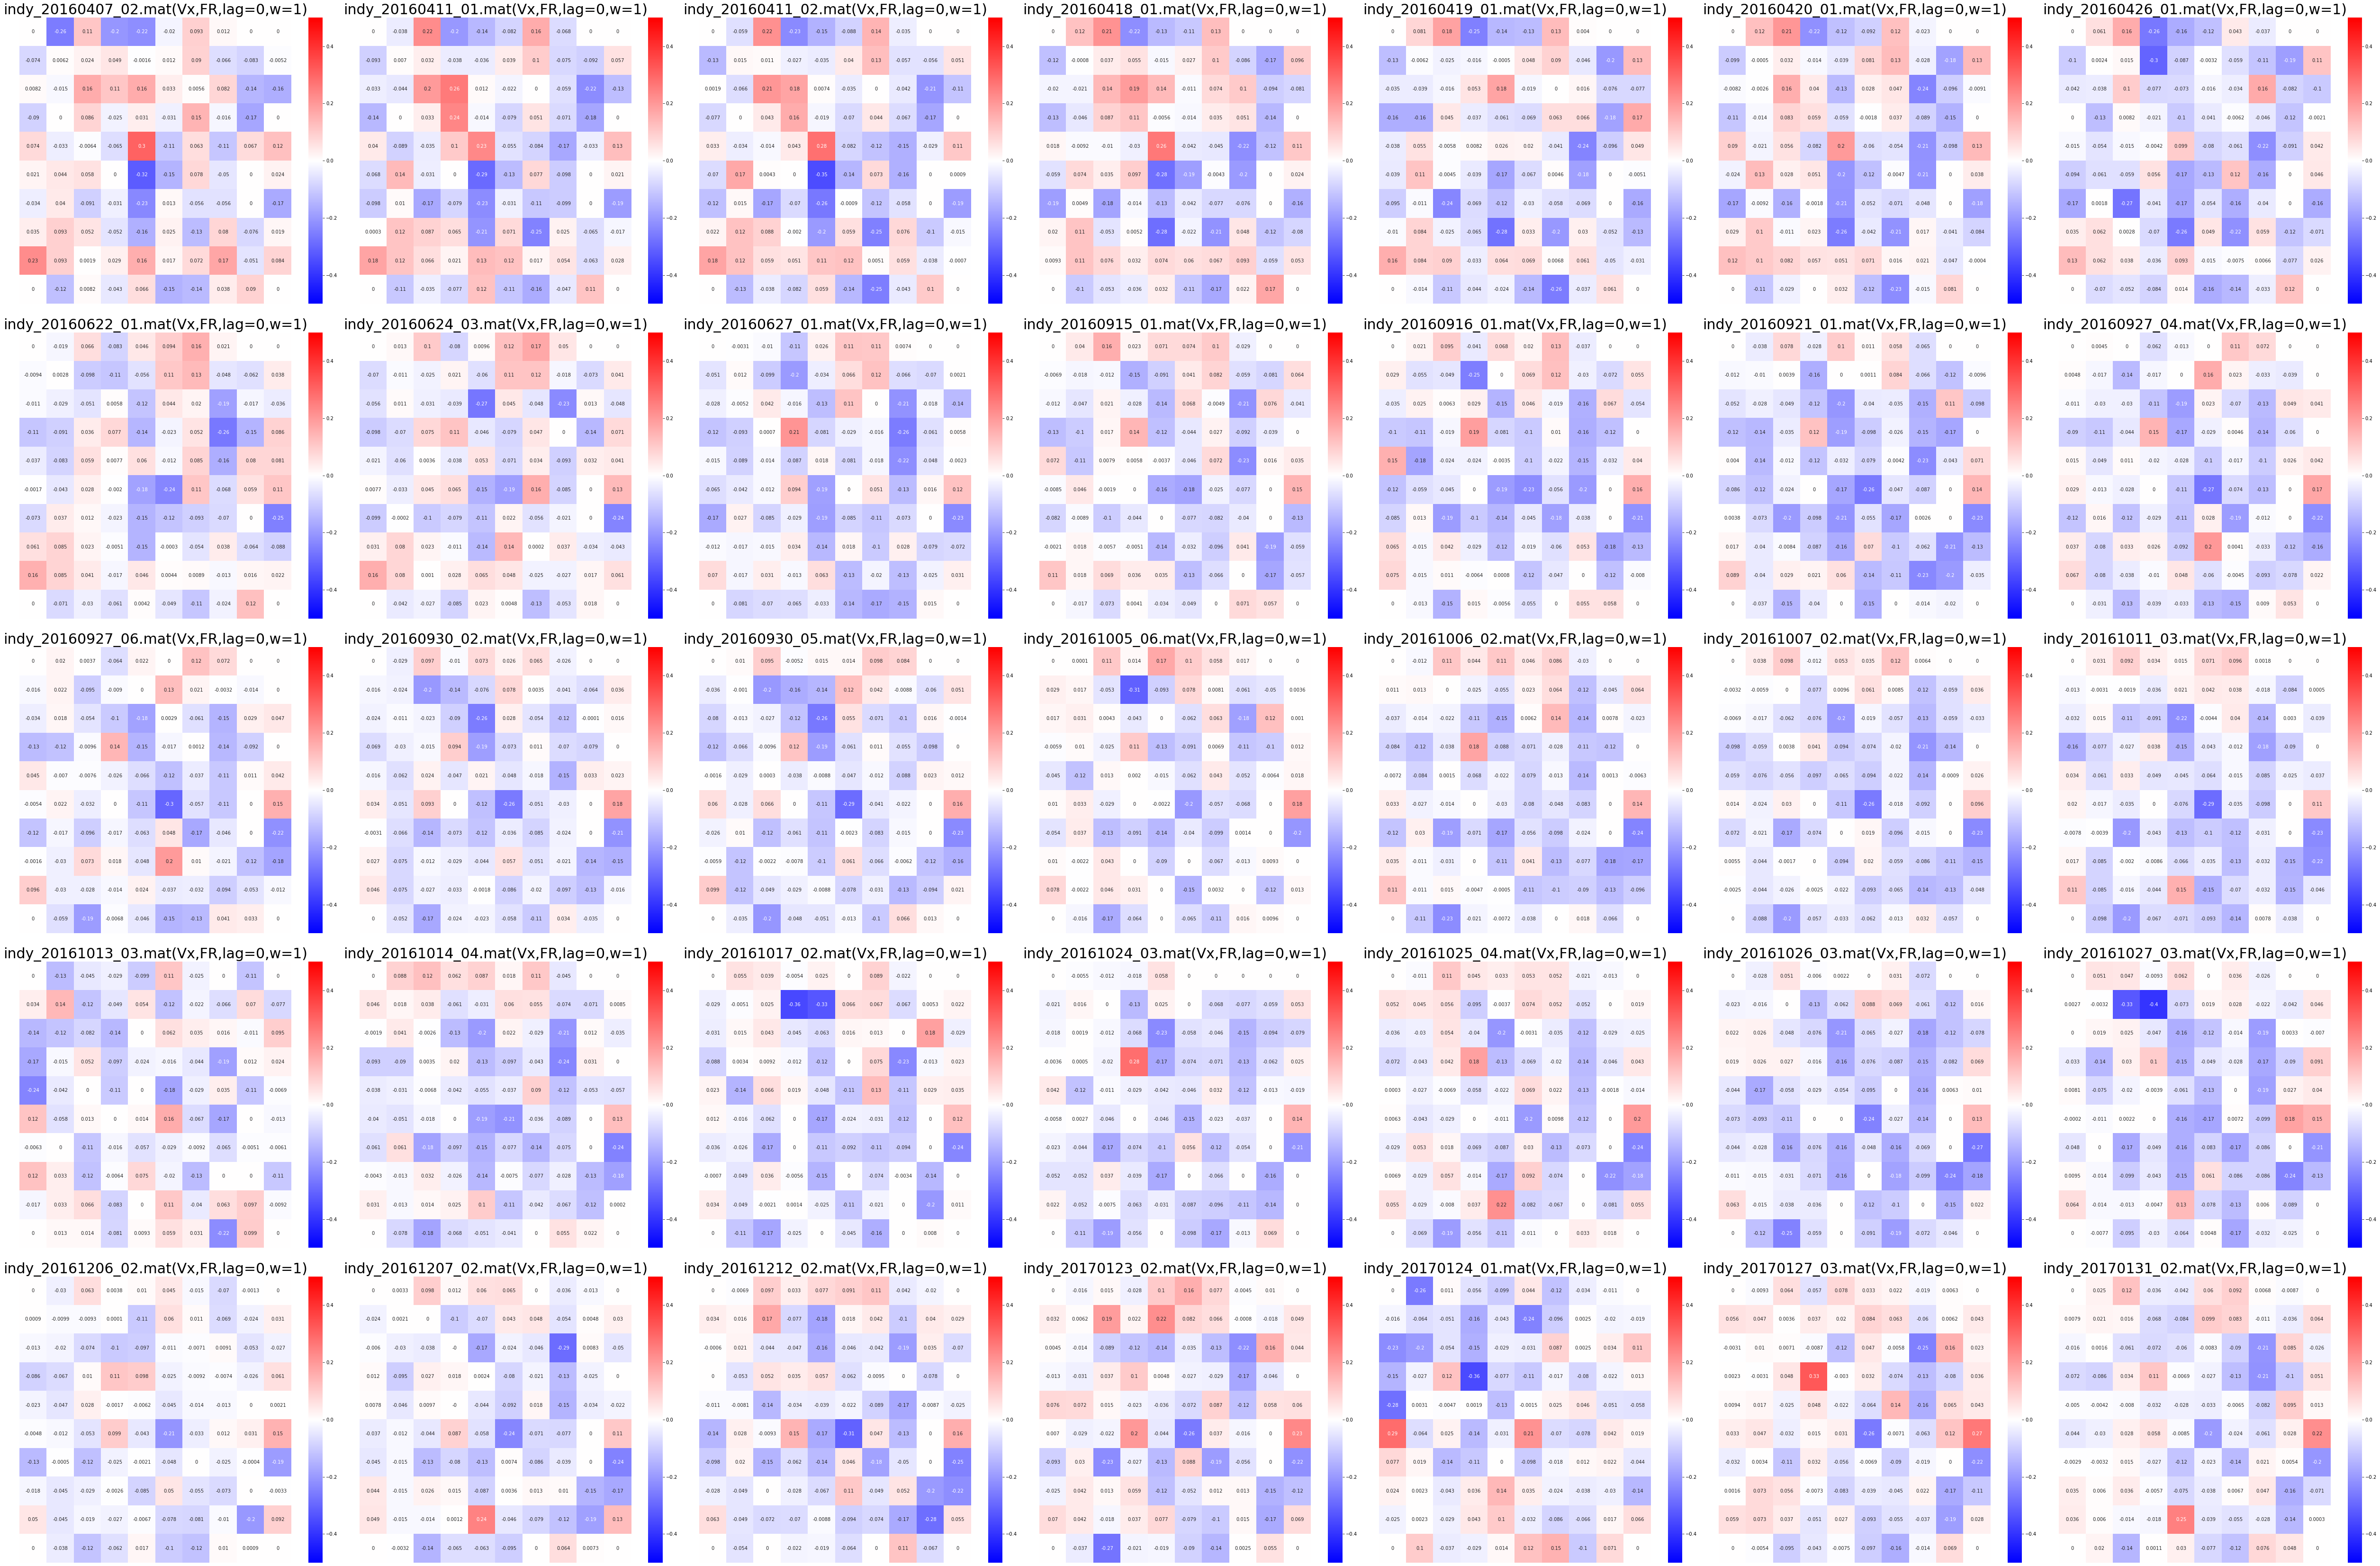

In [171]:
OUTPUT_FILE_PATH = str('/home/nclab62159/machineLearning/plot/heatmap20191113/need/')
Out_Name = str('Vx_unsort_win1_lag0')
title_name = str('(Vx,FR,lag=0,w=1)')
vmin_set = -0.5
cmap_set = 'bwr'
#OUTPUT_DATA_unsort,OUTPUT_DATA_hash,OUTPUT_DATA_lag,OUTPUT_DATA_window
out_data = OUTPUT_DATA_window
if len(List_FILE) >1:
    if(len(List_FILE) == 37):
        fig,ax = plt.subplots(4,10, figsize = (200,70))
   
        for i in range(len(List_FILE)):
            positive_count, negative_count = sort_value(out_data[i])
#         print(str(OUTPUT_SESSION[i])+',positive_count :'+str(positive_count)+',negative :'+ str(negative_count))
            print('s'+str(i+1)+':'+str(OUTPUT_SESSION[i]))
            if i <10:
            
#             ax[0,i].set_title(str(OUTPUT_SESSION[i])+',p:'+str(positive_count)+',n'+str(negative_count),size = 50)
            
                ax[0,i].set_title('s'+str(i+1)+' :'+str(OUTPUT_SESSION[i]),size = 50)
                sns.heatmap(abs(np.array(out_data[i])).reshape(10,10),vmin=0,vmax=0.5,cmap=comp_cus,xticklabels=False, yticklabels=False,annot=True,ax=ax[0,i])
        
            if i >9 and i <20:
            
#             ax[1,i-10].set_title(str(OUTPUT_SESSION[i])+',p:'+str(positive_count)+',n'+str(negative_count),size = 50)
                ax[1,i-10].set_title('s'+str(i+1)+' :'+str(OUTPUT_SESSION[i]),size = 50)
                sns.heatmap(abs(np.array(out_data[i])).reshape(10,10),vmin=0,vmax=0.5,cmap=comp_cus,xticklabels=False, yticklabels=False,annot=True,ax=ax[1,i-10])
        
            if i > 19 and i <30:
#             ax[2,i-20].set_title(str(OUTPUT_SESSION[i])+',p:'+str(positive_count)+',n'+str(negative_count),size = 50)
                ax[2,i-20].set_title('s'+str(i+1)+' :'+str(OUTPUT_SESSION[i]),size = 50)
                sns.heatmap(abs(np.array(out_data[i])).reshape(10,10),vmin=0,vmax=0.5,cmap=comp_cus,xticklabels=False, yticklabels=False,annot=True,ax=ax[2,i-20])
        
            if i > 29 and i <37:
#             ax[3,i-30].set_title(str(OUTPUT_SESSION[i])+',p:'+str(positive_count)+',n'+str(negative_count),size = 50)
                ax[3,i-30].set_title('s'+str(i+1)+' :'+str(OUTPUT_SESSION[i]),size = 50)
                sns.heatmap(abs(np.array(out_data[i])).reshape(10,10),vmin=0,vmax=0.5,cmap=comp_cus,xticklabels=False, yticklabels=False,annot=True,ax=ax[3,i-30])
    
    if(len(List_FILE) == 35):
        fig,ax = plt.subplots(5,7, figsize = (90,60))
        for i in range(len(List_FILE)):
            if i < 7:
                ax[0,i].set_title((OUTPUT_SESSION[i])+title_name,size = 30)
                sns.heatmap((np.array(out_data[i])).reshape(10,10),vmin=vmin_set,vmax=0.5,cmap=cmap_set,xticklabels=False, yticklabels=False,annot=True,ax=ax[0,i])
                
            if i >6 and i <14:
                ax[1,i-7].set_title((OUTPUT_SESSION[i])+title_name,size = 30)
                sns.heatmap((np.array(out_data[i])).reshape(10,10),vmin=vmin_set,vmax=0.5,cmap=cmap_set,xticklabels=False, yticklabels=False,annot=True,ax=ax[1,i-7])
                
            if i >13 and i < 21 :
                ax[2,i-14].set_title((OUTPUT_SESSION[i])+title_name,size = 30)
                sns.heatmap((np.array(out_data[i])).reshape(10,10),vmin=vmin_set,vmax=0.5,cmap=cmap_set,xticklabels=False, yticklabels=False,annot=True,ax=ax[2,i-14])
                
            if i > 20 and i < 28 :
                ax[3,i-21].set_title((OUTPUT_SESSION[i])+title_name,size = 30)
                sns.heatmap((np.array(out_data[i])).reshape(10,10),vmin=vmin_set,vmax=0.5,cmap=cmap_set,xticklabels=False, yticklabels=False,annot=True,ax=ax[3,i-21])
                
            if i > 27 and i < 35 :
                ax[4,i-28].set_title((OUTPUT_SESSION[i])+title_name,size = 30)
                sns.heatmap((np.array(out_data[i])).reshape(10,10),vmin=vmin_set,vmax=0.5,cmap=cmap_set,xticklabels=False, yticklabels=False,annot=True,ax=ax[4,i-28])
                
    plt.subplots_adjust(wspace = 0, hspace = 0.1)    
    plt.savefig(OUTPUT_FILE_PATH + Out_Name +'.png')

            
            
            
            




